# Big Entropy and the Generalized Linear Model

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az

import warnings
warnings.filterwarnings("ignore")

### Maximum Entropy

###### Code 9.1

In [2]:
d = {'A':[0, 0, 10, 0, 0], 
     'B':[0, 1, 8, 1, 0], 
     'C':[0, 2, 6, 2, 0], 
     'D':[1, 2, 4, 2, 1], 
     'E':[2, 2, 2, 2, 2]}
p = pd.DataFrame(data=d)

###### Code 9.2

In [4]:
p_norm = p / p.sum(0)
p_norm

,A,B,C,D,E
0,0.0,0.0,0.0,0.1,0.2
1,0.0,0.1,0.2,0.2,0.2
2,1.0,0.8,0.6,0.4,0.2
3,0.0,0.1,0.2,0.2,0.2
4,0.0,0.0,0.0,0.1,0.2


###### Code 9.3

In [7]:
entropy = lambda x: - np.sum(np.where(x == 0, 0, x * np.log(x)))
H = p_norm.apply(entropy, axis=0)
H

A   -0.000000
B    0.639032
C    0.950271
D    1.470808
E    1.609438
dtype: float64

###### Code 9.4 & Figure 9.1

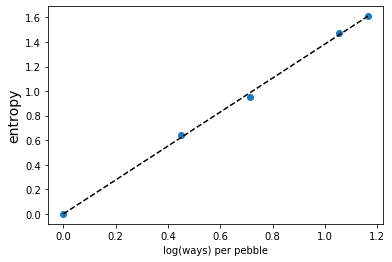

In [8]:
ways = [1, 90, 1260, 37800, 113400]
logwayspp = np.log(ways)/10
plt.plot(logwayspp, H, 'o')
plt.plot([0.0, max(logwayspp)], [0.0, max(H)], '--k')
plt.ylabel('entropy', fontsize=14)
plt.xlabel('log(ways) per pebble');

###### Code 9.5

In [9]:
# Build list of the candidate distributions.
p = [[1/4, 1/4, 1/4, 1/4],
     [2/6, 1/6, 1/6, 2/6],
     [1/6, 2/6, 2/6, 1/6],
     [1/8, 4/8, 2/8, 1/8]]

# Compute expected value of each. The sum of the multiplied entries is just a dot product.
p_ev = [np.dot(i, [0, 1, 1, 2]) for i in p]
p_ev

[1.0, 0.9999999999999999, 1.0, 1.0]

###### Code 9.6

In [10]:
# Compute entropy of each distribution
p_ent = [entropy(i) for i in p]
p_ent

[1.3862943611198906,
 1.3296613488547582,
 1.3296613488547582,
 1.2130075659799042]

###### Code 9.7

In [12]:
p = 0.7
A = [(1-p)**2, p*(1-p), (1-p)*p, p**2]
A

[0.09000000000000002,
 0.21000000000000002,
 0.21000000000000002,
 0.48999999999999994]

###### Code 9.8

In [14]:
# entropy(A)
-np.sum(A*np.log(A))

1.221728604109787

###### Code 9.9

In [26]:
def sim_p(G=1.4):
    x123 = np.random.uniform(size=3)
    x4 = (G * np.sum(x123) - x123[1] - x123[2]) / (2 - G)
    x1234 = np.concatenate((x123, [x4]))
    z = np.sum(x1234)
    p = x1234 / z
    return - np.sum(p * np.log(p)), p

###### Code 9.10 & Figure 9.4

In [47]:
H = np.frompyfunc(sim_p, 0, 2)(np.empty(100000))

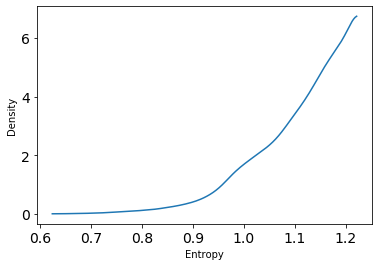

In [48]:
az.plot_kde(H[0])
plt.xlabel('Entropy')
plt.ylabel('Density');

###### Code 9.11

In [54]:
entropies, distributions = H

###### Code 9.12

In [58]:
np.max(entropies)

1.2217285345464484

###### Code 9.13

In [59]:
distributions[np.argmax(entropies)]

array([0.09003723, 0.20985644, 0.2100691 , 0.49003723])

In [14]:
import sys, IPython, scipy, matplotlib, platform, statsmodels, arviz
print("""
This notebook was created using:\nPython {}\nIPython {}\nPyMC3 {}\nSeaborn {}\nNumPy {}\nPandas {}\nStatsmodels {}\nMatplotlib {}\nScipy {}\nArviz {}\n
""".format(sys.version[:5], IPython.__version__, pm.__version__, sns.__version__, np.__version__, pd.__version__, statsmodels.__version__, matplotlib.__version__, scipy.__version__, arviz.__version__))



This notebook was created using:
Python 3.7.6
IPython 7.12.0
PyMC3 3.8
Seaborn 0.10.0
NumPy 1.18.1
Pandas 1.0.1
Statsmodels 0.11.0
Matplotlib 3.1.3
Scipy 1.4.1
Arviz 0.6.1


